# Proton Spin Up

In [28]:
import ipywidgets as widgets
from ipywidgets import interact, IntSlider
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
from scipy import optimize

## Polarization vs Time

<Axes: title={'center': 'Polarization Over Time'}, xlabel='Datetime', ylabel='Polarization'>

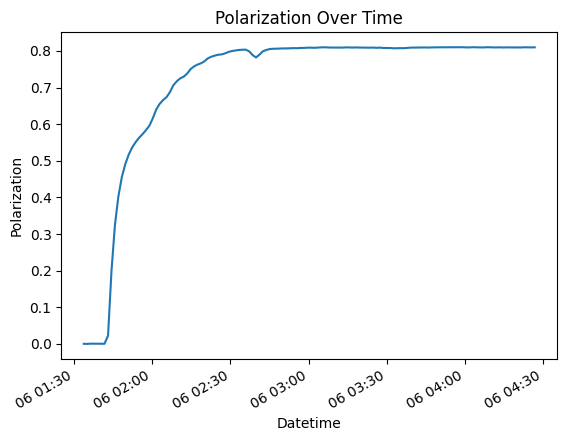

In [33]:

with open("FROST_deuteron.txt","r") as eventfile:



    df = pd.read_json(eventfile, lines=True)
df['stop_time'] = pd.to_datetime(df['stop_time'])
df.set_index('stop_time', inplace=True)

df['pol'].plot(title='Polarization Over Time',
                      xlabel='Datetime',
                      ylabel='Polarization')


## Interactive Plot, Drag Slider to Select Result Curve

In [1]:
def plot_pol_array(index):
    plt.figure(figsize=(10, 6))
    pol_array = df.iloc[index]['rescurve']  # Get array from selected row
    plt.plot(pol_array, linewidth=2)
    plt.title(f'Result Signal {index} (Polarization: {df.iloc[index]['pol']:.2f})')
    plt.grid(True, alpha=0.3)
    plt.show()

# Create interactive widget
interact(plot_pol_array,
         index=IntSlider(min=0, max=len(df)-1, step=1, value=9,
                        description='Row Index:'))

NameError: name 'interact' is not defined